# Exploratory Descriptive Analysis

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
#folder_path = '../data/'
#glob.glob(folder_path + '*.csv')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Dataco/Dataco SPMF/DataCoSupplyChainDataset_new.csv'

In [5]:

df = pd.read_csv(file_path, encoding='ISO-8859-1')


<h2> See the Structures of the Datasets</h2>

In [6]:
# customer + payment related data
df.iloc[:, :20].head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Product Sales,Late_delivery_risk,Category Name,New Category Name,Customer Id,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market
0,PAYMENT,5,4,Late delivery,314.640015,1,Kids' Golf Clubs,Kids & Toys,20755,South Ozone Park,United States of America,Consumer,NY,902 Lazy Port,11420,6,Outdoors,40.675449,-73.811142,Europe
1,PAYMENT,5,4,Late delivery,311.359985,1,Women's Apparel,Women's Apparel,19492,South Ozone Park,United States of America,Consumer,NY,902 Lazy Port,11420,5,Golf,40.675449,-73.811142,Europe
2,TRANSFER,6,2,Late delivery,309.720001,1,Women's Apparel,Women's Apparel,19491,Caguas,Puerto Rico,Home Office,PR,1607 Hazy Butterfly Swale,725,5,Golf,18.250792,-66.370544,Europe
3,DEBIT,2,4,Advance shipping,304.809998,0,Cleats,Sports Equipment,19490,Caguas,Puerto Rico,Consumer,PR,9753 Little Willow Estates,725,4,Apparel,18.274948,-66.370506,Europe
4,DEBIT,2,4,Advance shipping,298.250000,0,Cleats,Sports Equipment,19489,Caguas,Puerto Rico,Consumer,PR,9753 Little Willow Estates,725,4,Apparel,18.274948,-66.370506,Europe


In [7]:
# order related data
df.iloc[:, 21:40].head()

,Order Country,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Sales After Discount,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders)
0,España,9/25/2017 9:06,68394,48.000000,0.12,170989,-1.70,1,399.989990,351.989990,-598.390015,Southern Europe,Cataluña,PENDING_PAYMENT,303,38,Garmin Forerunner 910XT GPS Watch,399.989990,9/30/2017 9:06
1,España,9/25/2017 9:06,68394,25.000000,0.25,170990,-0.77,2,100.000000,75.000000,-57.529999,Southern Europe,Cataluña,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,9/30/2017 9:06
2,Bélgica,9/24/2017 8:56,68325,50.000000,0.25,170817,0.28,4,200.000000,150.000000,42.000000,Western Europe,Amberes,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,9/30/2017 8:56
3,Francia,9/28/2017 7:53,68596,40.790001,0.17,171492,0.45,4,239.960007,199.169998,89.629997,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,9/30/2017 7:53
4,Francia,9/28/2017 7:53,68596,0.600000,0.01,171493,0.50,1,59.990002,59.389999,29.700001,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,9/30/2017 7:53


In [8]:
# order related data - continue
df.iloc[:, 41:].head()

""
0
1
2
3
4


In [10]:
df.info()

# These columns have null values: Customer Lname, Customer Zipcode, Product Description
# Can drop the Product Description column. It has all the null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Delivery Status                180519 non-null  object 
 4   Product Sales                  180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   New Category Name              180519 non-null  object 
 8   Customer Id                    180519 non-null  int64  
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Segment               180519 non-null  object 
 12  Customer State                

In [11]:
null_counts = df.isnull().sum()
null_counts

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Delivery Status,0
Product Sales,0
Late_delivery_risk,0
Category Name,0
New Category Name,0
Customer Id,0
Customer City,0


In [12]:
#df = df.drop(columns=['Product Description', 'Customer Email', 'Product Image', 'Customer Password'])

#df['Customer Lname'] = df['Customer Lname'].fillna('Unknown')
#df['Customer Zipcode'] = df['Customer Zipcode'].fillna('Unknown')

#df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
#df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

df['Year'] = df['order date (DateOrders)'].dt.year
df['Month'] = df['order date (DateOrders)'].dt.month
df['YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

AttributeError: Can only use .dt accessor with datetimelike values

In [13]:
import pandas as pd

# Convert 'order date (DateOrders)' to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')

# Now you can extract year, month, etc.
df['Year'] = df['order date (DateOrders)'].dt.year
df['Month'] = df['order date (DateOrders)'].dt.month
df['YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Product Sales,Late_delivery_risk,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,order date (DateOrders),...,Order Item Profit Ratio,Order Item Quantity,Sales,Sales After Discount,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Year,Month
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,183.107609,0.548291,6691.379495,35922.099026,5.443460,29.719955,-84.915675,2016-06-12 17:47:04.669868800,...,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,2015.971150,6.235449
min,0.000000,0.000000,7.490000,0.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,2015-01-01 00:00:00,...,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,2015.000000,1.000000
25%,2.000000,2.000000,104.379997,0.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,2015-09-21 13:49:00,...,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,2015.000000,3.000000
50%,3.000000,4.000000,163.990005,1.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,2016-06-11 13:06:00,...,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,2016.000000,6.000000
75%,5.000000,4.000000,247.399994,1.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,2017-03-01 08:42:00,...,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,2017.000000,9.000000
max,6.000000,4.000000,1939.989990,1.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,2018-01-31 23:38:00,...,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,2018.000000,12.000000
std,1.623722,1.374449,120.043670,0.497664,4162.918106,37542.907275,1.629246,9.813646,21.433241,NaN,...,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.829429,3.403571


In [14]:
folder_path = '/content/drive/MyDrive/Dataco/Dataco SPMF'

In [15]:
df.to_csv(folder_path + 'DataCo_cleaned.csv', index = False) # Save the cleaned df to csv

In [ ]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Product Sales,Late_delivery_risk,Category Name,New Category Name,Customer Id,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Year,Month,YearMonth
0,PAYMENT,5,4,Late delivery,314.640015,1,Kids' Golf Clubs,Kids & Toys,20755,South Ozone Park,...,PENDING_PAYMENT,303,38,Garmin Forerunner 910XT GPS Watch,399.989990,9/30/2017 9:06,Standard Class,2017,9,2017-09
1,PAYMENT,5,4,Late delivery,311.359985,1,Women's Apparel,Women's Apparel,19492,South Ozone Park,...,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,9/30/2017 9:06,Standard Class,2017,9,2017-09
2,TRANSFER,6,2,Late delivery,309.720001,1,Women's Apparel,Women's Apparel,19491,Caguas,...,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,9/30/2017 8:56,Second Class,2017,9,2017-09
3,DEBIT,2,4,Advance shipping,304.809998,0,Cleats,Sports Equipment,19490,Caguas,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,9/30/2017 7:53,Standard Class,2017,9,2017-09
4,DEBIT,2,4,Advance shipping,298.250000,0,Cleats,Sports Equipment,19489,Caguas,...,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,9/30/2017 7:53,Standard Class,2017,9,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,TRANSFER,2,1,Late delivery,399.980011,1,Indoor/Outdoor Games,Outdoor & Adventure,1005,Riverside,...,PENDING,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,2/1/2015 0:08,First Class,2015,1,2015-01
180515,TRANSFER,2,1,Late delivery,395.980011,1,Cardio Equipment,Sports Equipment,9141,Riverside,...,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,2/1/2015 0:08,First Class,2015,1,2015-01
180516,TRANSFER,2,1,Late delivery,391.980011,1,Men's Footwear,Mens' Apparel,291,Riverside,...,PENDING,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,2/1/2015 0:08,First Class,2015,1,2015-01
180517,TRANSFER,2,1,Late delivery,387.980011,1,Fishing,Outdoor & Adventure,2813,Riverside,...,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2/1/2015 0:08,First Class,2015,1,2015-01


## Numerical Features Analysis

### Unique Values - Customers, Orders, Products

In [16]:
unique_count_customer = df['Customer Id'].nunique(dropna=False)
print(f'There are {unique_count_customer} unique customers.')

unique_count_orderid = df['Order Id'].nunique(dropna=False)
print(f'There are {unique_count_orderid} unique orders.')


unique_count_pid = df['Product Card Id'].nunique(dropna=False)
print(f'There are {unique_count_pid} unique products.')


There are 20652 unique customers.
There are 65752 unique orders.
There are 118 unique products.


### Numerical Value Distributions

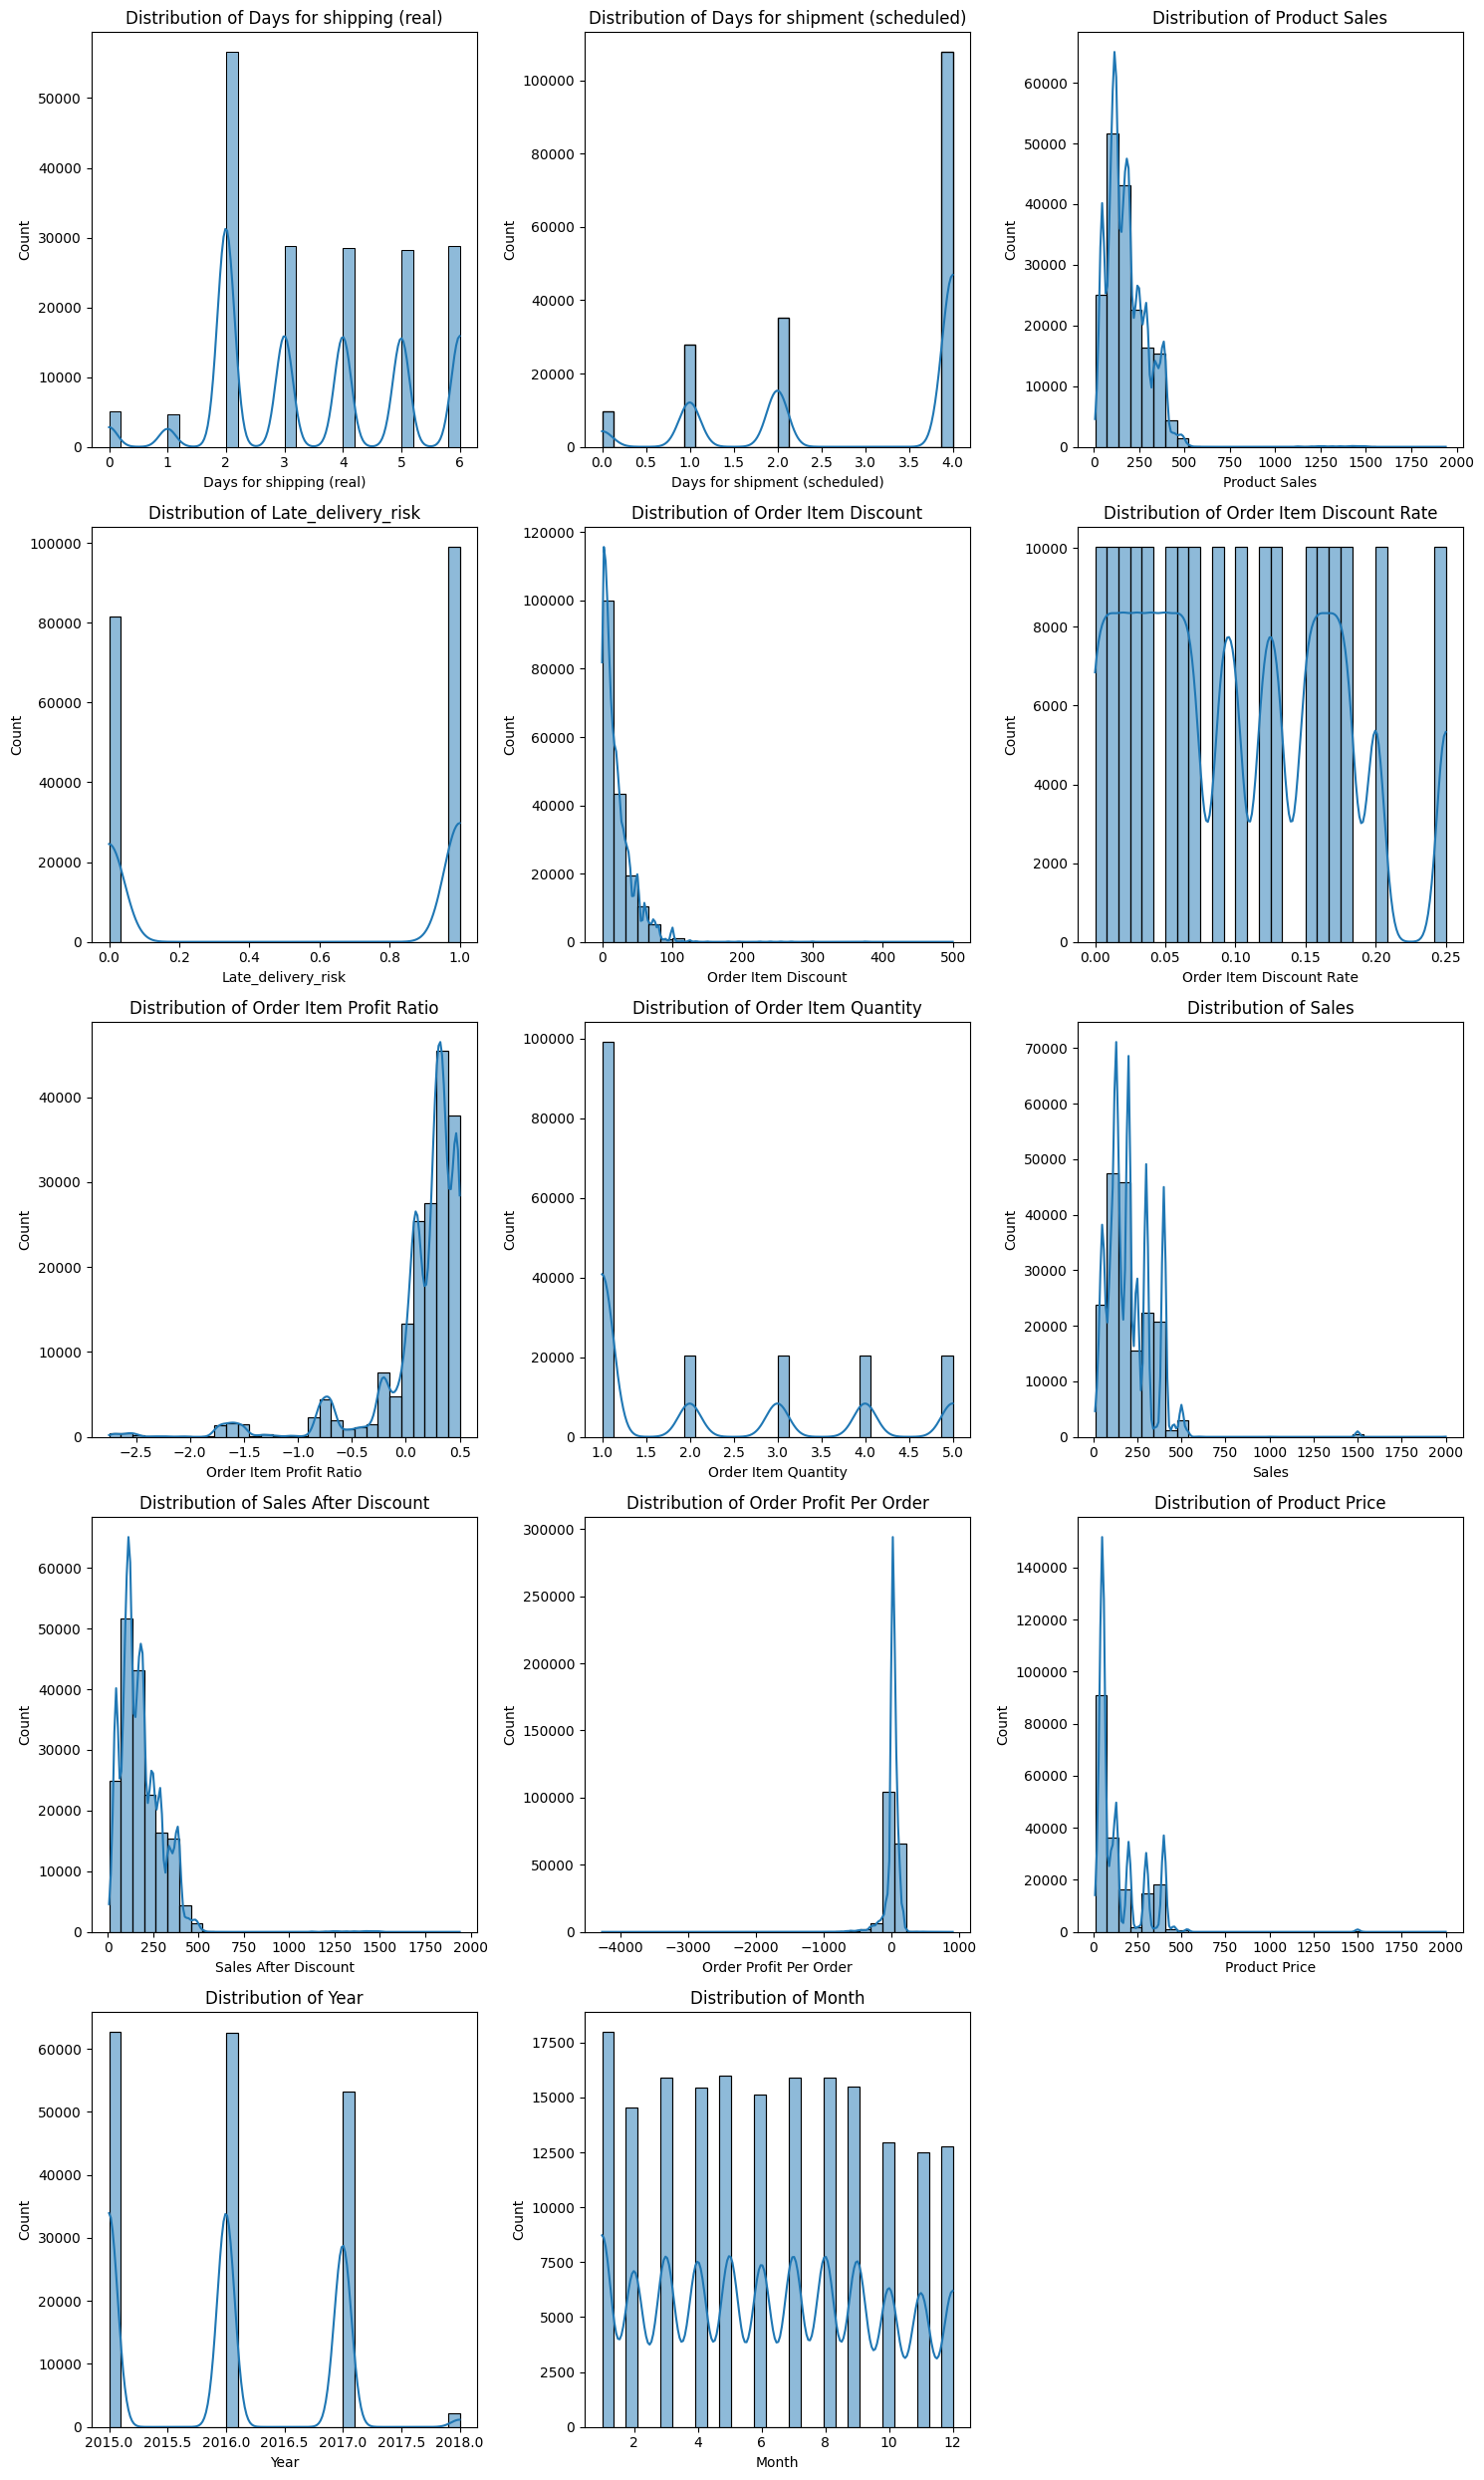

In [17]:
numerical_data = df.select_dtypes(include=[np.number]).drop(columns=['Latitude','Longitude','Department Id','Customer Zipcode','Order Id','Product Category Id', 'Order Item Id','Customer Id','Product Card Id'])

num_cols = numerical_data.shape[1]
n_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


### Unique Years Across the Dataset

In [18]:
# Ensure 'order date (DateOrders)' and 'shipping date (DateOrders)' are in datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')

# Extract the year after conversion to datetime
df['Year'] = df['order date (DateOrders)'].dt.year
unique_years = df['Year'].unique()

df['ShippingYear'] = df['shipping date (DateOrders)'].dt.year
unique_shipping_years = df['ShippingYear'].unique()

# Display unique years
print(f'The unique years in the order data are: {unique_years}')
print(f'The unique years in the shipping data are: {unique_shipping_years}')

# Find the earliest and latest dates for both order and shipping dates
earliest_order_date = df['order date (DateOrders)'].min().date()
latest_order_date = df['order date (DateOrders)'].max().date()

earliest_ship_date = df['shipping date (DateOrders)'].min().date()
latest_ship_date = df['shipping date (DateOrders)'].max().date()

# Display earliest and latest dates
print(f'The earliest order date in the data is: {earliest_order_date}')
print(f'The latest order date in the data is: {latest_order_date}')
print(f'The earliest shipping date in the data is: {earliest_ship_date}')
print(f'The latest shipping date in the data is: {latest_ship_date}')


The unique years in the order data are: [2017 2016 2015 2018]
The unique years in the shipping data are: [2017 2016 2015 2018]
The earliest order date in the data is: 2015-01-01
The latest order date in the data is: 2018-01-31
The earliest shipping date in the data is: 2015-01-03
The latest shipping date in the data is: 2018-02-06


### Order Count Over Time by Status

In [19]:
order_subset = df.iloc[:, 25:41]
   # Add the 'order_YearMonth' column to the subset using the original DataFrame
order_subset['order_YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')
#order_subset['order_YearMonth'] = order_subset['order date (DateOrders)'].dt.strftime('%Y-%m')
order_subset

,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Sales After Discount,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_YearMonth
0,0.12,170989,-1.70,1,399.989990,351.989990,-598.390015,Southern Europe,Cataluña,PENDING_PAYMENT,303,38,Garmin Forerunner 910XT GPS Watch,399.989990,2017-09-30 09:06:00,Standard Class,2017-09
1,0.25,170990,-0.77,2,100.000000,75.000000,-57.529999,Southern Europe,Cataluña,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 09:06:00,Standard Class,2017-09
2,0.25,170817,0.28,4,200.000000,150.000000,42.000000,Western Europe,Amberes,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 08:56:00,Second Class,2017-09
3,0.17,171492,0.45,4,239.960007,199.169998,89.629997,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
4,0.01,171493,0.50,1,59.990002,59.389999,29.700001,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0.25,4965,0.13,1,49.980000,37.490002,4.690000,Central America,Francisco Morazán,PENDING,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,2015-02-01 00:08:00,First Class,2015-01
180515,0.20,4966,0.31,1,99.989998,79.989998,25.040001,Central America,Francisco Morazán,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,2015-02-01 00:08:00,First Class,2015-01
180516,0.07,4967,0.41,1,129.990005,120.889999,49.570000,Central America,Francisco Morazán,PENDING,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,2015-02-01 00:08:00,First Class,2015-01
180517,0.15,4968,0.47,1,399.980011,339.980011,159.789993,Central America,Francisco Morazán,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2015-02-01 00:08:00,First Class,2015-01


In [20]:
order_subset = df.iloc[:, 25:41]
# Check the available columns in the subset
print(order_subset.columns)

# Assuming 'order date (DateOrders)' is present in the original DataFrame (df)
# and you want to include it in the subset, adjust the slicing accordingly.
# For example, if 'order date (DateOrders)' is at index 24:
order_subset = df.iloc[:, 24:41]

   # Add the 'order_YearMonth' column to the subset using the original DataFrame
#order_subset['order_YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')order_subset
# Add the 'order_YearMonth' column to the subset using the original DataFrame
order_subset['order_YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

# Display the subset
order_subset


Index(['Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Sales After Discount',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')


,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Sales After Discount,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_YearMonth
0,48.000000,0.12,170989,-1.70,1,399.989990,351.989990,-598.390015,Southern Europe,Cataluña,PENDING_PAYMENT,303,38,Garmin Forerunner 910XT GPS Watch,399.989990,2017-09-30 09:06:00,Standard Class,2017-09
1,25.000000,0.25,170990,-0.77,2,100.000000,75.000000,-57.529999,Southern Europe,Cataluña,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 09:06:00,Standard Class,2017-09
2,50.000000,0.25,170817,0.28,4,200.000000,150.000000,42.000000,Western Europe,Amberes,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 08:56:00,Second Class,2017-09
3,40.790001,0.17,171492,0.45,4,239.960007,199.169998,89.629997,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
4,0.600000,0.01,171493,0.50,1,59.990002,59.389999,29.700001,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,12.500000,0.25,4965,0.13,1,49.980000,37.490002,4.690000,Central America,Francisco Morazán,PENDING,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,2015-02-01 00:08:00,First Class,2015-01
180515,20.000000,0.20,4966,0.31,1,99.989998,79.989998,25.040001,Central America,Francisco Morazán,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,2015-02-01 00:08:00,First Class,2015-01
180516,9.100000,0.07,4967,0.41,1,129.990005,120.889999,49.570000,Central America,Francisco Morazán,PENDING,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,2015-02-01 00:08:00,First Class,2015-01
180517,60.000000,0.15,4968,0.47,1,399.980011,339.980011,159.789993,Central America,Francisco Morazán,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2015-02-01 00:08:00,First Class,2015-01


In [21]:
order_subset = df.iloc[:, 25:41]
# Check the available columns in the subset
print(order_subset.columns)

# Assuming 'order date (DateOrders)' is present in the original DataFrame (df)
# and you want to include it in the subset, adjust the slicing accordingly.
# For example, if 'order date (DateOrders)' is at index 24:
order_subset = df.iloc[:, 24:41]

# Verify that 'order date (DateOrders)' is in the subset
print(order_subset.columns)
order_subset['order_YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

#order_subset['order_YearMonth'] = order_subset['order date (DateOrders)'].dt.strftime('%Y-%m')
order_subset

Index(['Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Sales After Discount',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')
Index(['Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Sales After Discount', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')


,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Sales After Discount,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_YearMonth
0,48.000000,0.12,170989,-1.70,1,399.989990,351.989990,-598.390015,Southern Europe,Cataluña,PENDING_PAYMENT,303,38,Garmin Forerunner 910XT GPS Watch,399.989990,2017-09-30 09:06:00,Standard Class,2017-09
1,25.000000,0.25,170990,-0.77,2,100.000000,75.000000,-57.529999,Southern Europe,Cataluña,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 09:06:00,Standard Class,2017-09
2,50.000000,0.25,170817,0.28,4,200.000000,150.000000,42.000000,Western Europe,Amberes,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-30 08:56:00,Second Class,2017-09
3,40.790001,0.17,171492,0.45,4,239.960007,199.169998,89.629997,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
4,0.600000,0.01,171493,0.50,1,59.990002,59.389999,29.700001,Western Europe,Alsacia-Champaña-Ardenas-Lorena,ON_HOLD,365,17,Perfect Fitness Perfect Rip Deck,59.990002,2017-09-30 07:53:00,Standard Class,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,12.500000,0.25,4965,0.13,1,49.980000,37.490002,4.690000,Central America,Francisco Morazán,PENDING,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,2015-02-01 00:08:00,First Class,2015-01
180515,20.000000,0.20,4966,0.31,1,99.989998,79.989998,25.040001,Central America,Francisco Morazán,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,2015-02-01 00:08:00,First Class,2015-01
180516,9.100000,0.07,4967,0.41,1,129.990005,120.889999,49.570000,Central America,Francisco Morazán,PENDING,403,18,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,2015-02-01 00:08:00,First Class,2015-01
180517,60.000000,0.15,4968,0.47,1,399.980011,339.980011,159.789993,Central America,Francisco Morazán,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2015-02-01 00:08:00,First Class,2015-01


In [22]:
order_grouped = order_subset.groupby(["order_YearMonth", "Order Status"])["Order Item Id"].count().reset_index()
order_grouped = order_grouped.rename(columns = {"Order Item Id": "Order Counts"})
order_grouped

,order_YearMonth,Order Status,Order Counts
0,2015-01,CANCELED,84
1,2015-01,CLOSED,560
2,2015-01,COMPLETE,1760
3,2015-01,ON_HOLD,270
4,2015-01,PAYMENT_REVIEW,50
...,...,...,...
328,2018-01,PAYMENT_REVIEW,28
329,2018-01,PENDING,227
330,2018-01,PENDING_PAYMENT,451
331,2018-01,PROCESSING,252


In [23]:
# prompt: Using dataframe order_grouped: suggest plot

# Import necessary libraries
import altair as alt

# Create a line chart showing the trend of Order Counts over time for different order statuses
chart = alt.Chart(order_grouped).mark_line().encode(
    x='order_YearMonth',
    y='Order Counts',
    color='Order Status'
).properties(
    title='Order Counts Trend Over Time by Order Status'
)

# Display the chart
chart

# Suggestion:
# A line chart displaying the "Order Counts" over time (order_YearMonth) grouped by "Order Status"
# This will allow you to visualize the trend of orders for each status and compare them.
# You may want to further analyze specific status trends or identify periods with high or low orders.


alt.Chart(...)

In [ ]:
fig = px.line(order_grouped, x = "order_YearMonth", y = "Order Counts", color = "Order Status",
              title = "Order Count Over Time by Status",
              labels = {"order_count": "Order Count", "order_date": "Order Date", "order_status": "Order Status"},
              markers = True)

fig.show()

### Order Count Over Time

In [24]:
order_grouped2 = order_subset.groupby(["order_YearMonth"])["Order Item Id"].count().reset_index()
order_grouped2 = order_grouped2.rename(columns = {"Order Item Id": "Order Counts"})
order_grouped2.head()

,order_YearMonth,Order Counts
0,2015-01,5322
1,2015-02,4729
2,2015-03,5362
3,2015-04,5126
4,2015-05,5357


In [25]:
fig = px.line(order_grouped2, x = "order_YearMonth", y = "Order Counts", title='Order Count Over Time',
              markers=True)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Order Count',
    xaxis=dict(
        tickmode='auto',
        nticks=20,
        tickformat='%b %d, %Y'
    ),
    yaxis=dict(
        tickmode='auto',
        nticks=10
    )
)

fig.show()

### Correlation Analysis

In [26]:
print(numerical_data.columns)


Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Product Sales', 'Late_delivery_risk', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Sales After Discount',
       'Order Profit Per Order', 'Product Price', 'Year', 'Month'],
      dtype='object')


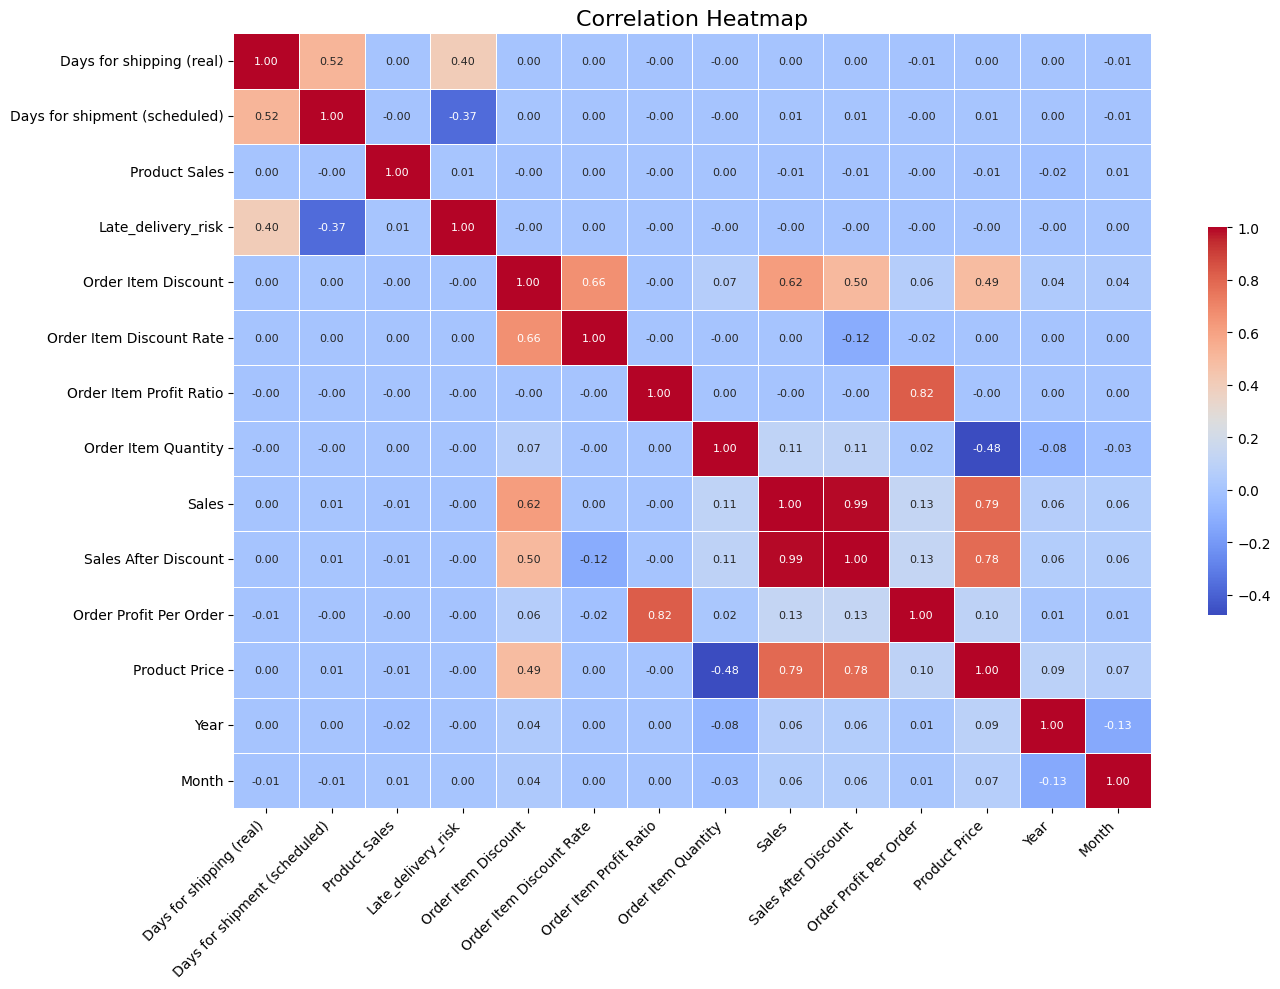

In [27]:
#correlation_matrix = numerical_data.drop(columns=['Order Zipcode', 'Latitude', 'Longitude','Department Id','Customer Zipcode','Order Id','Product Category Id', 'Order Item Id','Customer Id','Product Card Id']).corr()
#numerical_data = df.select_dtypes(include=[np.number]).drop(columns=['Department Id','Customer Zipcode','Order Id','Product Category Id', 'Order Item Id','Customer Id','Product Card Id'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8},
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', size=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()


## Categorical Features Analysis

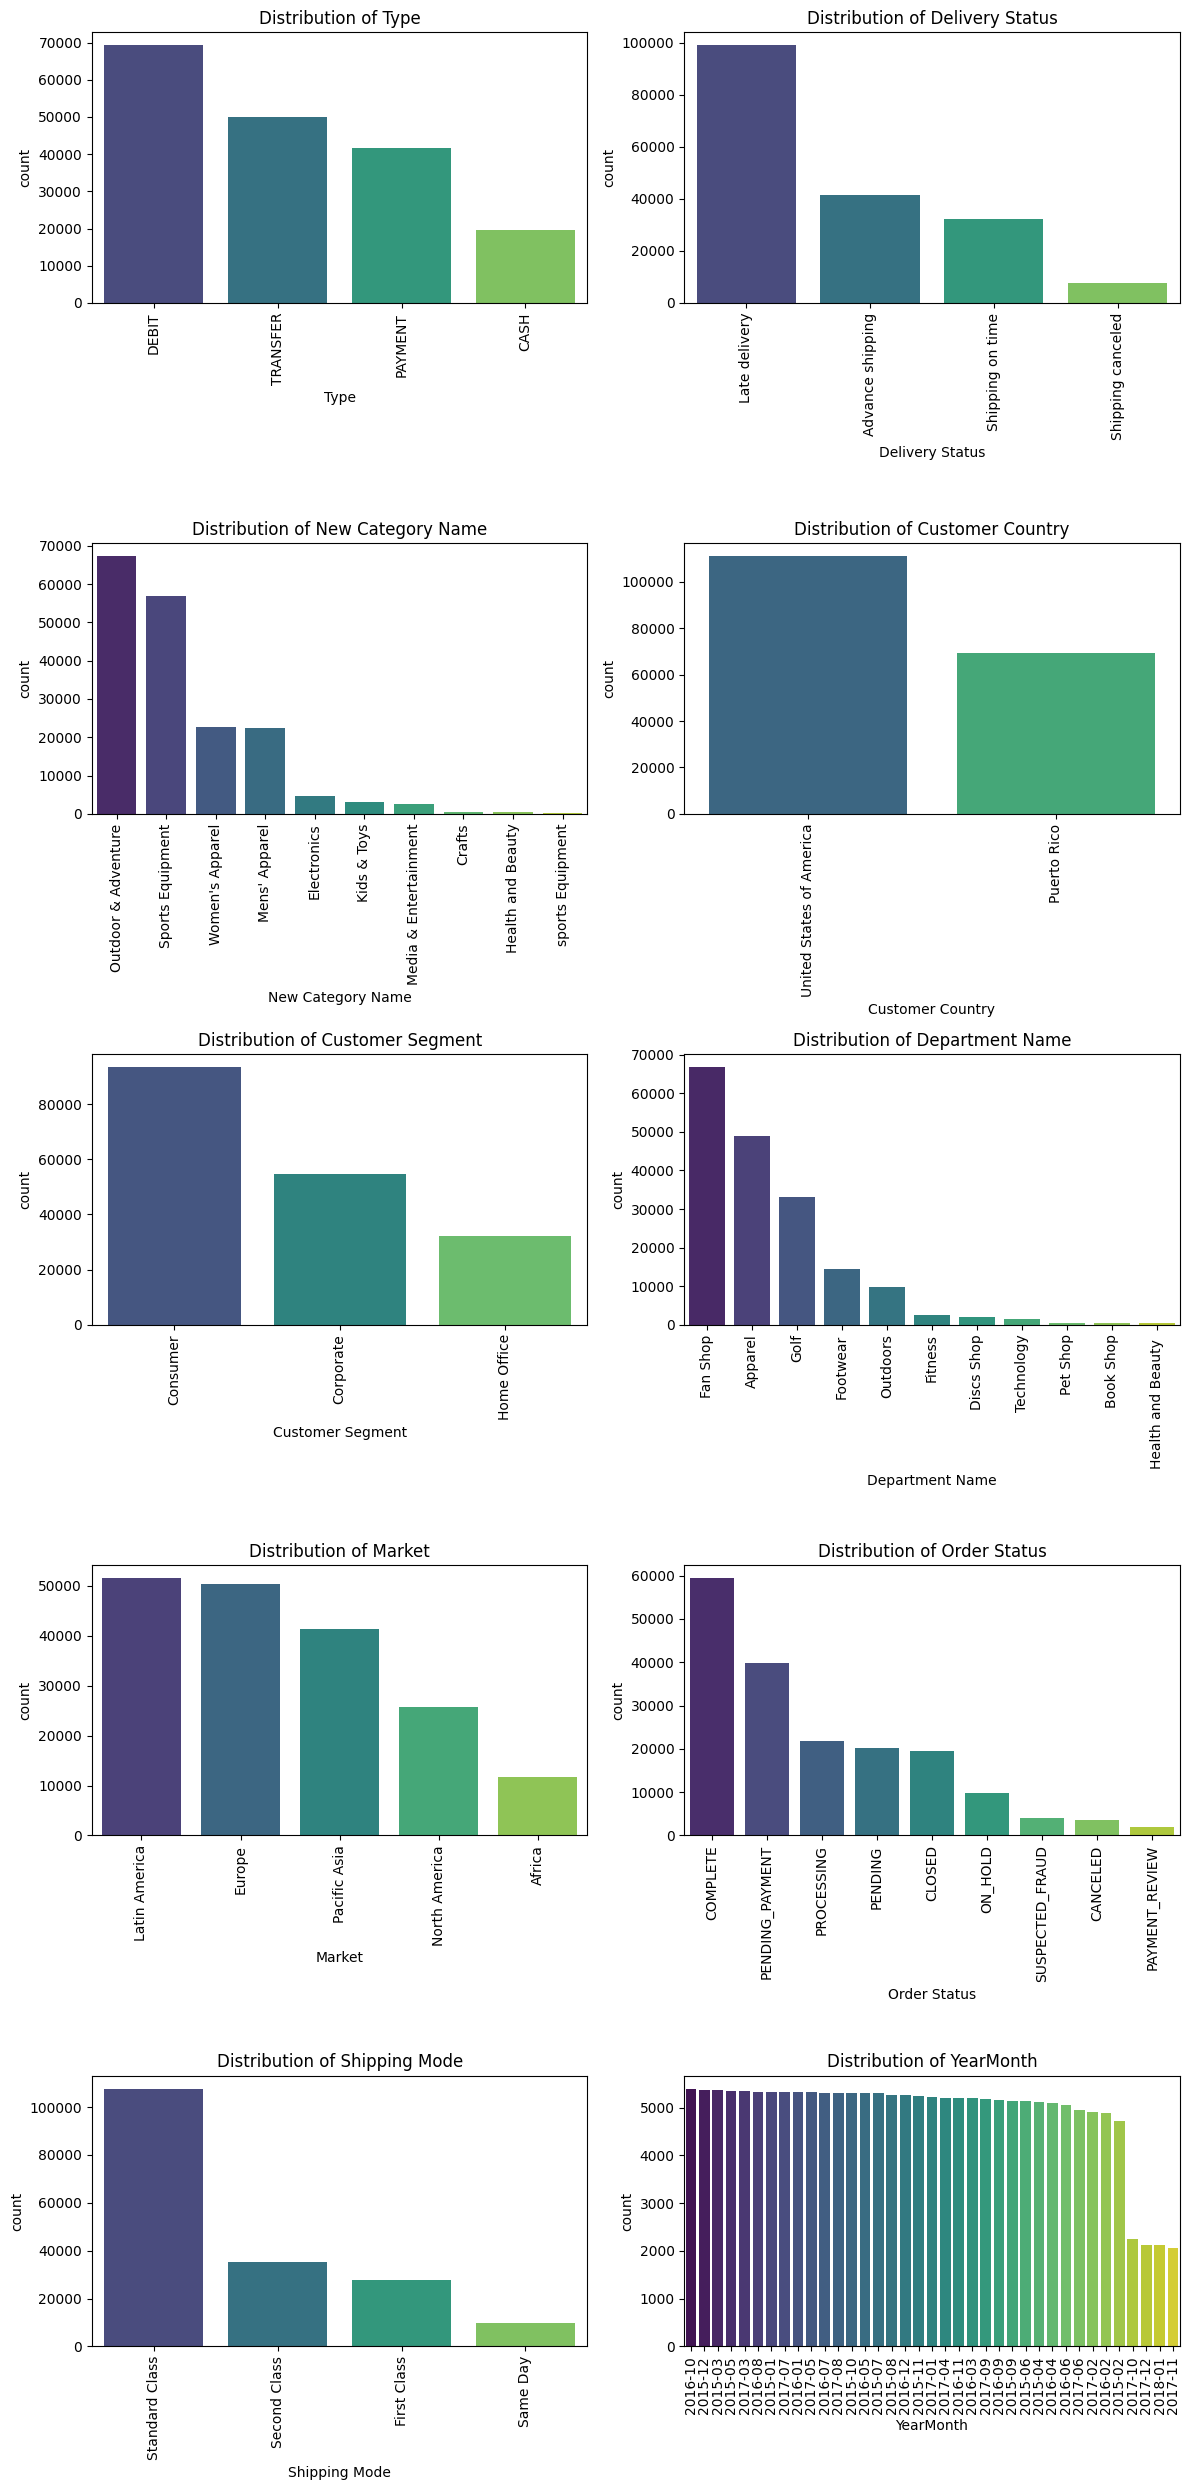

In [28]:
categorical_data = df.select_dtypes(include=['object']).drop(columns=['Customer City','Customer Street',
                    'Order City', 'Order State', 'Product Name', 'Category Name', 'Customer State',
                    'Order Country', 'Order Region'])

num_cols = categorical_data.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(12, 5 * n_rows))
for idx, col in enumerate(categorical_data.columns):
    plt.subplot(n_rows, 2, idx + 1)
    sns.countplot(x=categorical_data[col], palette="viridis", order=categorical_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


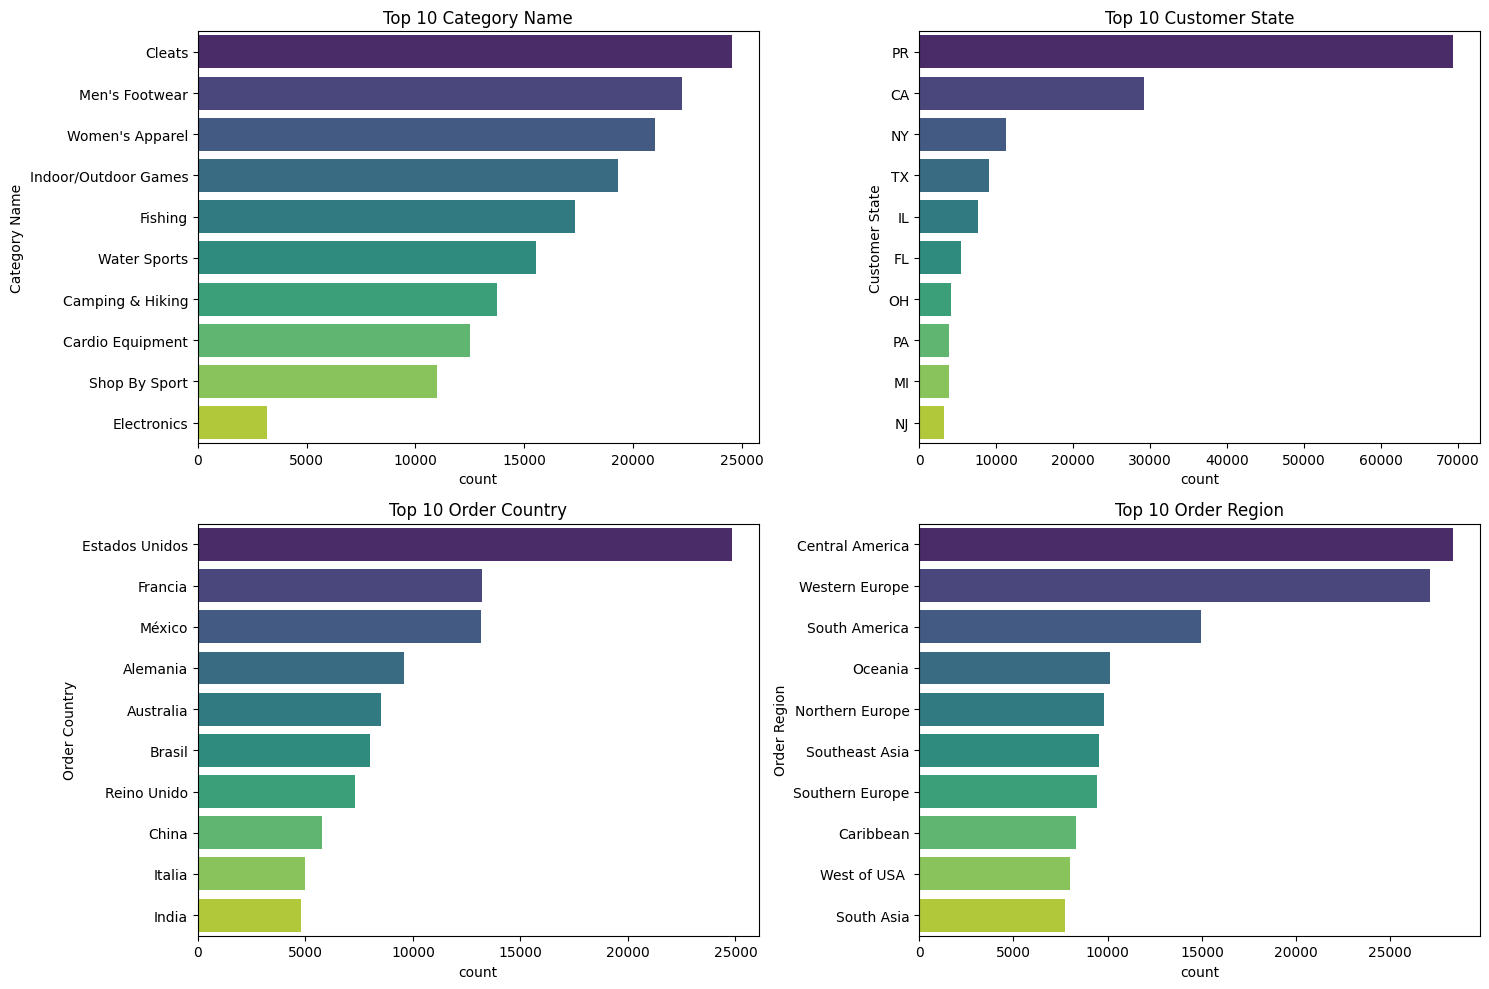

In [29]:
# Select the categorical columns that have more than 10 distinct values
categorical_data2 = df[['Category Name', 'Customer State', 'Order Country', 'Order Region']]

num_cols = categorical_data2.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data2.columns):
    plt.subplot(n_rows, 2, idx + 1)
    category_counts = categorical_data2[col].value_counts().head(10)
    sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
    plt.title(f'Top 10 {col}')
    plt.tight_layout()

plt.show()

## Sales Trend Analysis

### Monthly & Annually Sales Trend

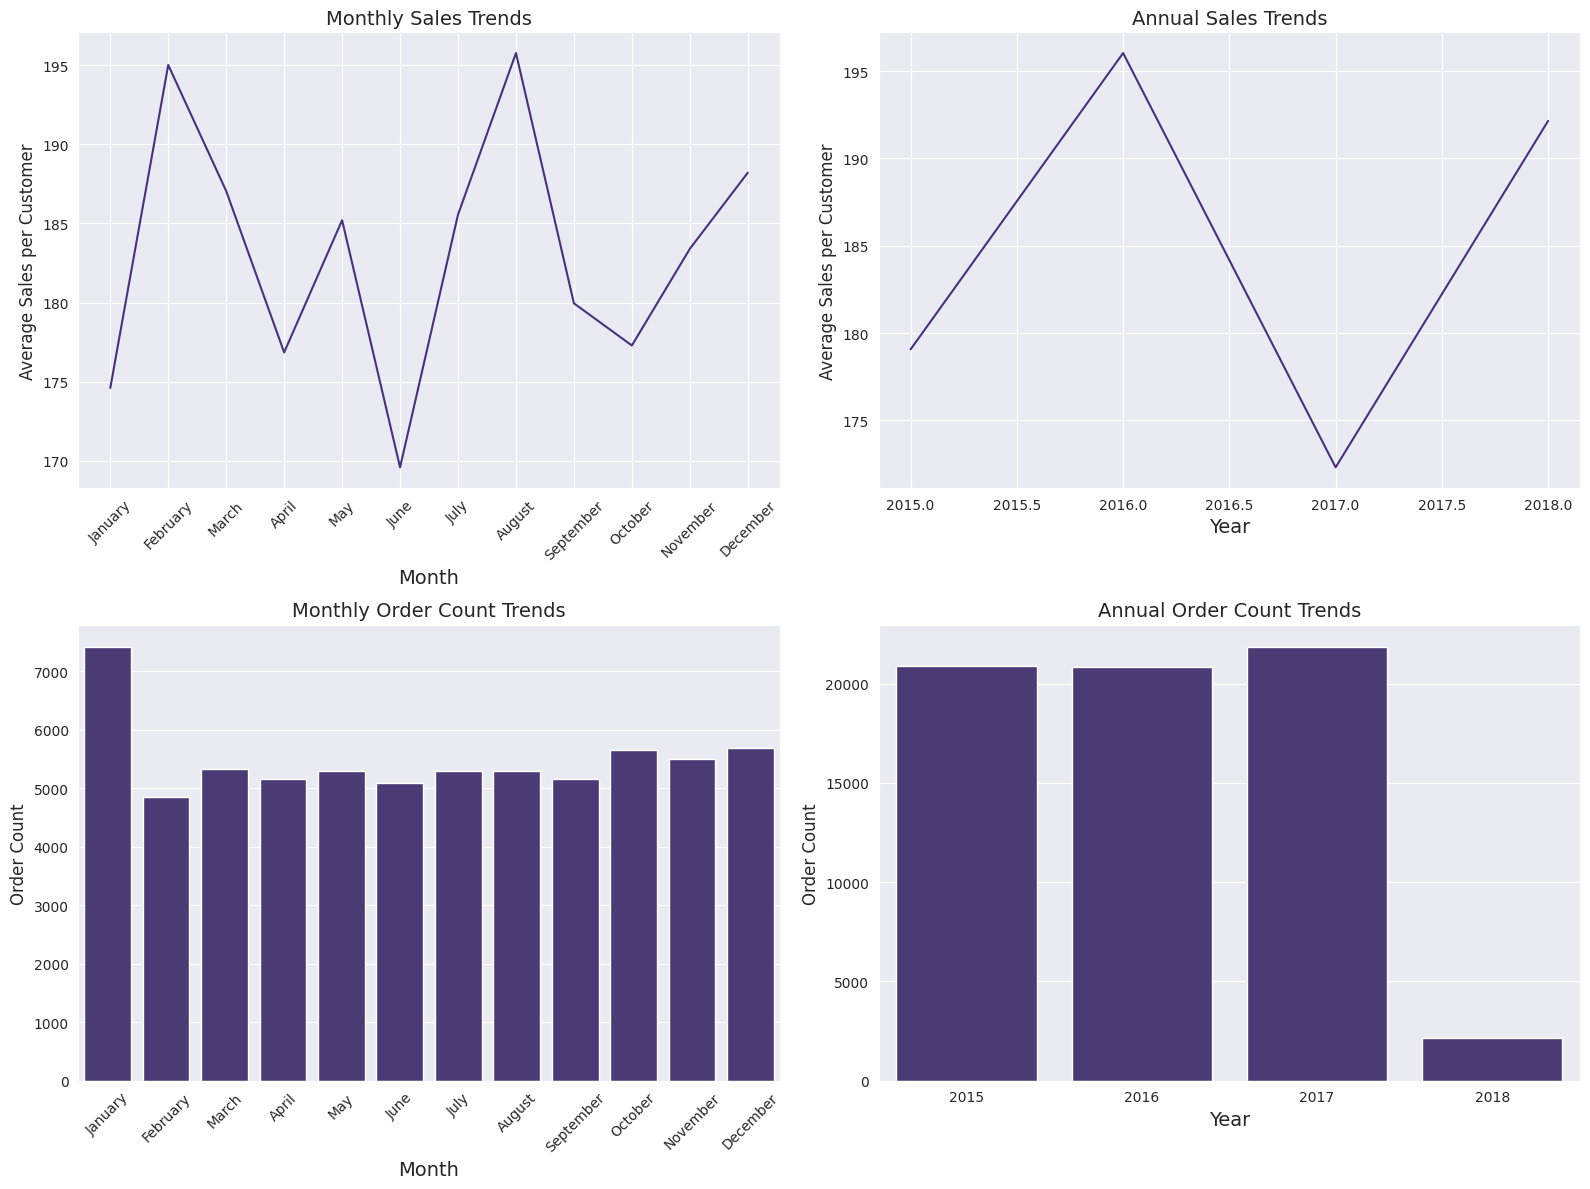

In [ ]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = df['order date (DateOrders)'].dt.month_name()
df['MonthName'] = pd.Categorical(df['MonthName'], categories=months_in_order, ordered=True)

monthly_sales = df.groupby('MonthName')['Product Sales'].mean()
yearly_sales = df.groupby('Year')['Product Sales'].mean()

monthly_order_count = df.groupby('MonthName')['Order Id'].nunique()
yearly_order_count = df.groupby('Year')['Order Id'].nunique()

sns.set_palette("viridis")
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Monthly sales trends
sns.lineplot(data=monthly_sales, ax=axs[0, 0])
axs[0, 0].set_title('Monthly Sales Trends', fontsize=14)
axs[0, 0].set_xlabel('Month', fontsize=14)
axs[0, 0].set_ylabel('Average Sales per Customer', fontsize=12)
axs[0, 0].set_xticklabels(months_in_order, rotation=45)

# Annual sales trends
sns.lineplot(data=yearly_sales, ax=axs[0, 1])
axs[0, 1].set_title('Annual Sales Trends', fontsize=14)
axs[0, 1].set_xlabel('Year', fontsize=14)
axs[0, 1].set_ylabel('Average Sales per Customer', fontsize=12)

# Monthly order count trends
sns.barplot(x=monthly_order_count.index, y=monthly_order_count.values, ax=axs[1, 0])
axs[1, 0].set_title('Monthly Order Count Trends', fontsize=14)
axs[1, 0].set_xlabel('Month', fontsize=14)
axs[1, 0].set_ylabel('Order Count', fontsize=12)
axs[1, 0].set_xticklabels(months_in_order, rotation=45)

# Annual order count trends
sns.barplot(x=yearly_order_count.index, y=yearly_order_count.values, ax=axs[1, 1])
axs[1, 1].set_title('Annual Order Count Trends', fontsize=14)
axs[1, 1].set_xlabel('Year', fontsize=14)
axs[1, 1].set_ylabel('Order Count', fontsize=12)

plt.tight_layout()
plt.show()


### Monthly Sales & Profit Ratio & Discount Rate Average Trend

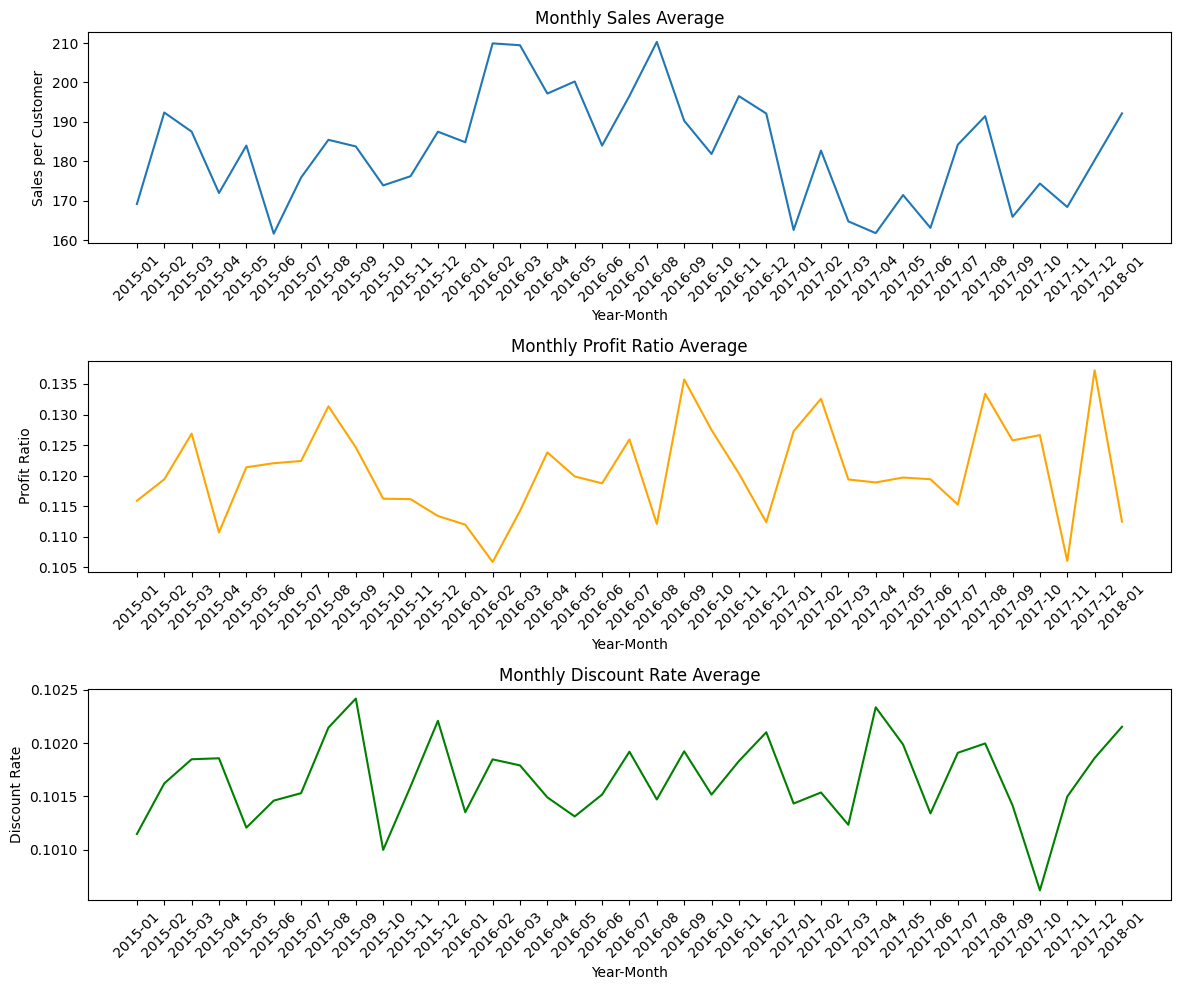

In [30]:
monthly_sales_avg = df.groupby('YearMonth')['Product Sales'].mean()
monthly_profit_ratio_avg = df.groupby('YearMonth')['Order Item Profit Ratio'].mean()
monthly_discount_rate_avg = df.groupby('YearMonth')['Order Item Discount Rate'].mean()

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot Monthly Sales Average
sns.lineplot(ax=axes[0], x=monthly_sales_avg.index, y=monthly_sales_avg)
axes[0].set_title('Monthly Sales Average')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Sales per Customer')
axes[0].tick_params(axis='x', rotation=45)

# Plot Monthly Profit Ratio Average
sns.lineplot(ax=axes[1], x=monthly_profit_ratio_avg.index, y=monthly_profit_ratio_avg, color='orange')
axes[1].set_title('Monthly Profit Ratio Average')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Profit Ratio')
axes[1].tick_params(axis='x', rotation=45)

# Plot Monthly Order Item Discount Rate Average
sns.lineplot(ax=axes[2], x=monthly_discount_rate_avg.index, y=monthly_discount_rate_avg, color='green')
axes[2].set_title('Monthly Discount Rate Average')
axes[2].set_xlabel('Year-Month')
axes[2].set_ylabel('Discount Rate')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### OLS Regression Report (for Total Profit Per Order)

In [31]:
df['Total Profit Per Order'] = df['Order Profit Per Order']*df['Order Item Quantity']
X = df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity']]
y = df['Total Profit Per Order']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Profit Per Order   R-squared:                       0.026
Model:                                OLS   Adj. R-squared:                  0.026
Method:                     Least Squares   F-statistic:                     1597.
Date:                    Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                            04:19:39   Log-Likelihood:            -1.2704e+06
No. Observations:                  180519   AIC:                         2.541e+06
Df Residuals:                      180515   BIC:                         2.541e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Multiple Numerical Features Analysis

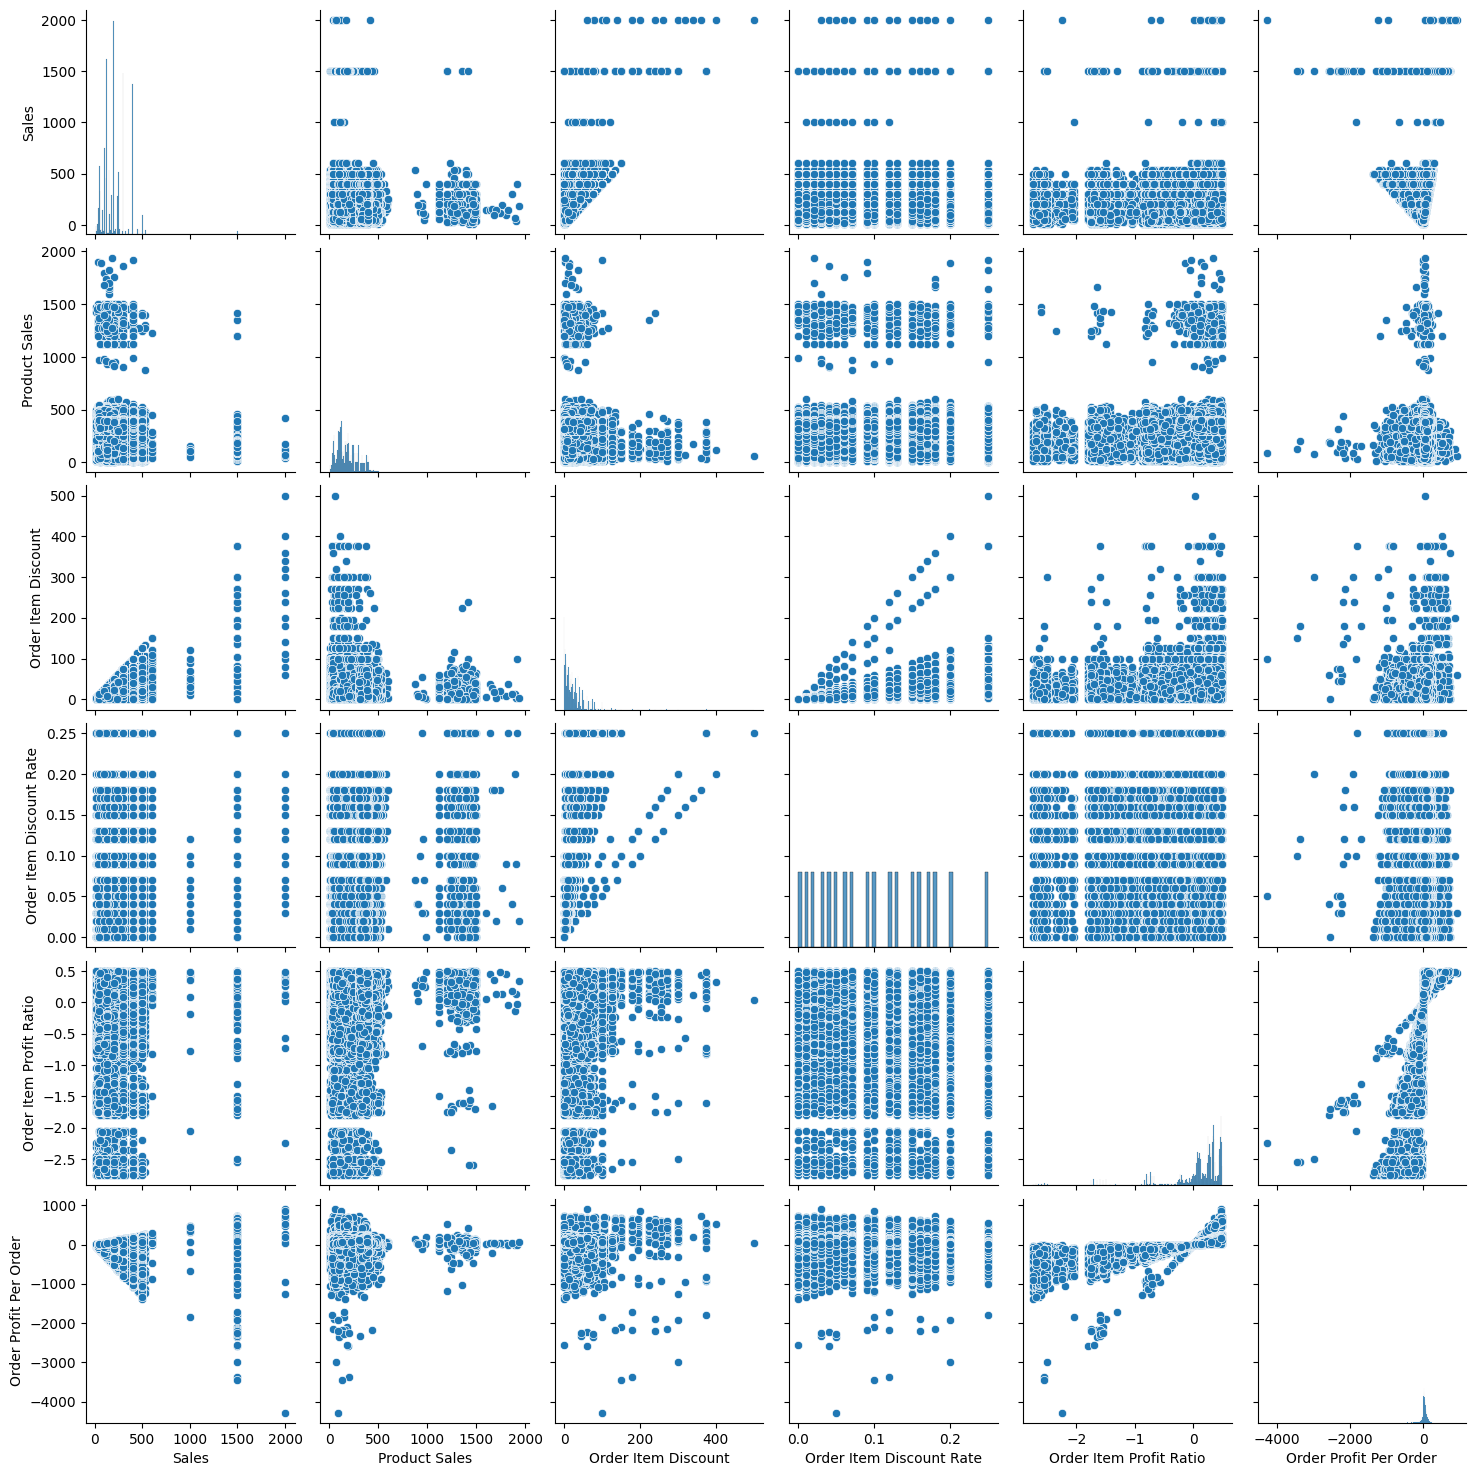

In [32]:
numerical_cols = ['Sales', 'Product Sales', 'Order Item Discount', 'Order Item Discount Rate',
                   'Order Item Profit Ratio', 'Order Profit Per Order' ]
df_selected = df[numerical_cols]
sns.pairplot(df_selected)
plt.show()

## Fraud Order Analysis

### Order Status Distribution

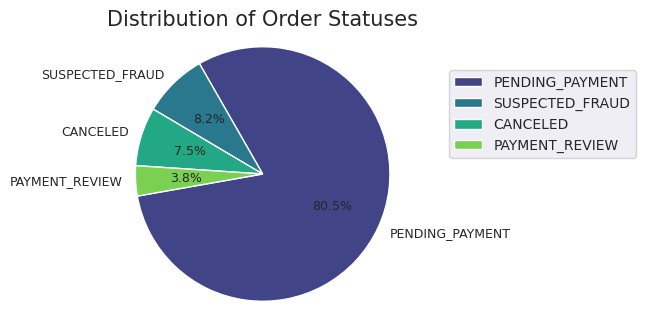

In [34]:
sns.set_palette("viridis")
sns.set_style("darkgrid")

relevant_statuses = ['SUSPECTED_FRAUD', 'CANCELED', 'COMPLETED', 'PENDING_PAYMENT', 'PAYMENT_REVIEW']
df_filtered = df[df['Order Status'].isin(relevant_statuses)]

status_counts = df_filtered['Order Status'].value_counts()
colors = sns.color_palette("viridis", len(status_counts))

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=190)

for text in texts + autotexts:
    text.set_fontsize(9)

plt.title('Distribution of Order Statuses', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.legend(fontsize=10, bbox_to_anchor=(0.7,0.4), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(top=0.5, left=0.0, bottom=0.15, right=0.45)
plt.show()


### Fraud v.s. Non-Fraud on Categorical Features

NameError: name 'fraud_df' is not defined

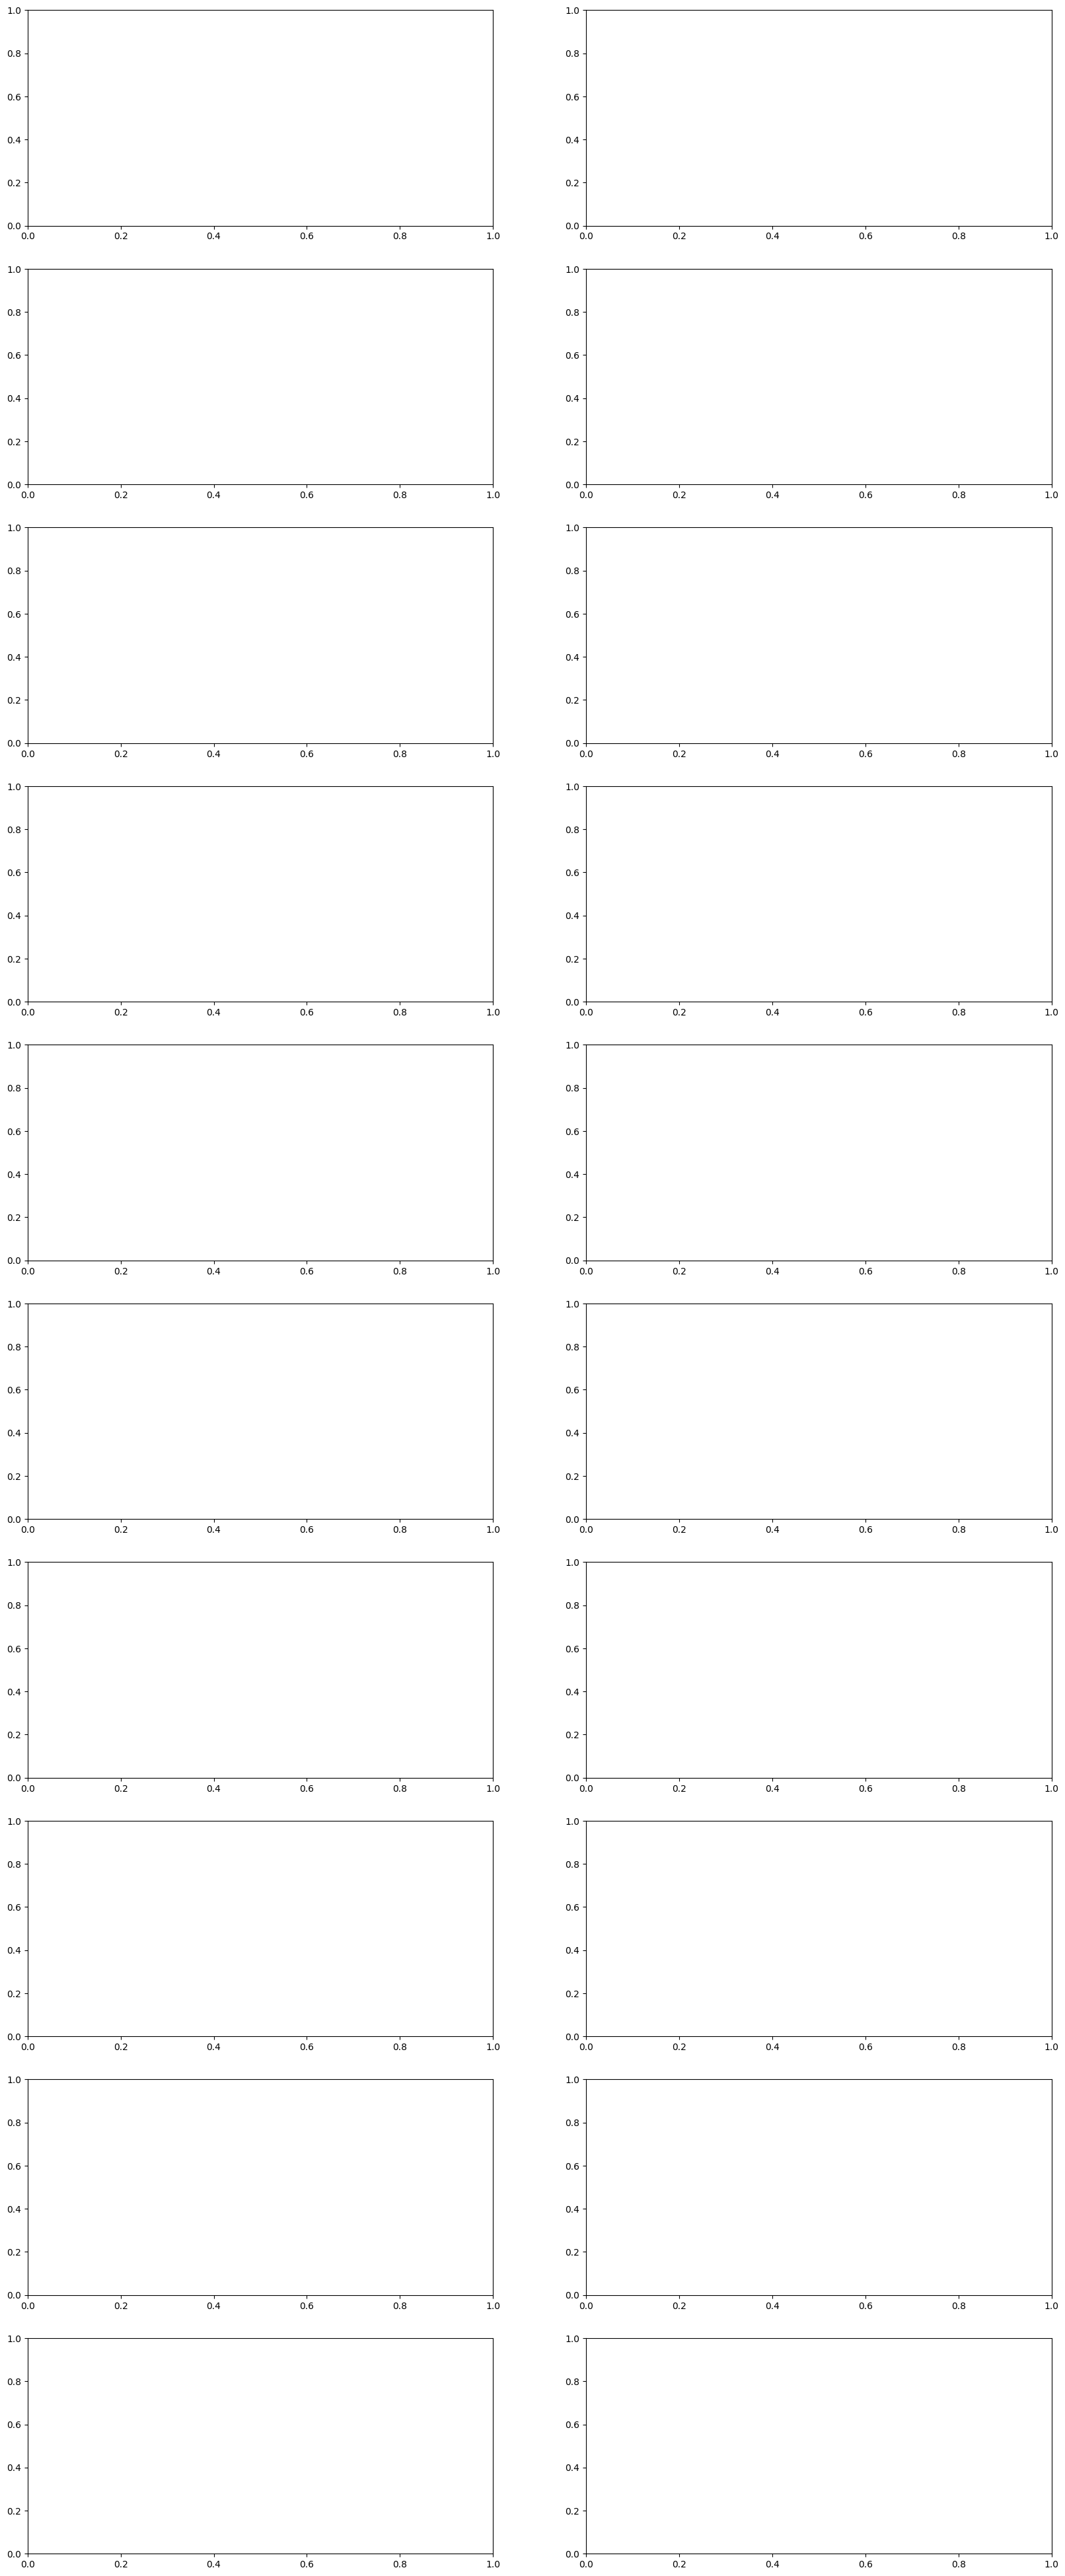

In [33]:
num_cols = 2
n_rows = len(categorical_data.columns)

fig, axs = plt.subplots(n_rows, num_cols, figsize=(20, 5 * n_rows))

for idx, col in enumerate(categorical_data.columns):
    # Plot for fraudulent orders
    sns.countplot(y=fraud_df[col], order=fraud_df[col].value_counts().index, ax=axs[idx, 0], palette="viridis")
    axs[idx, 0].set_title(f'Fraud - Distribution of {col}')

    # Plot for non-fraudulent orders
    sns.countplot(y=non_fraud_df[col], order=non_fraud_df[col].value_counts().index, ax=axs[idx, 1], palette="viridis")
    axs[idx, 1].set_title(f'Non-Fraud - Distribution of {col}')

plt.tight_layout()
plt.show()


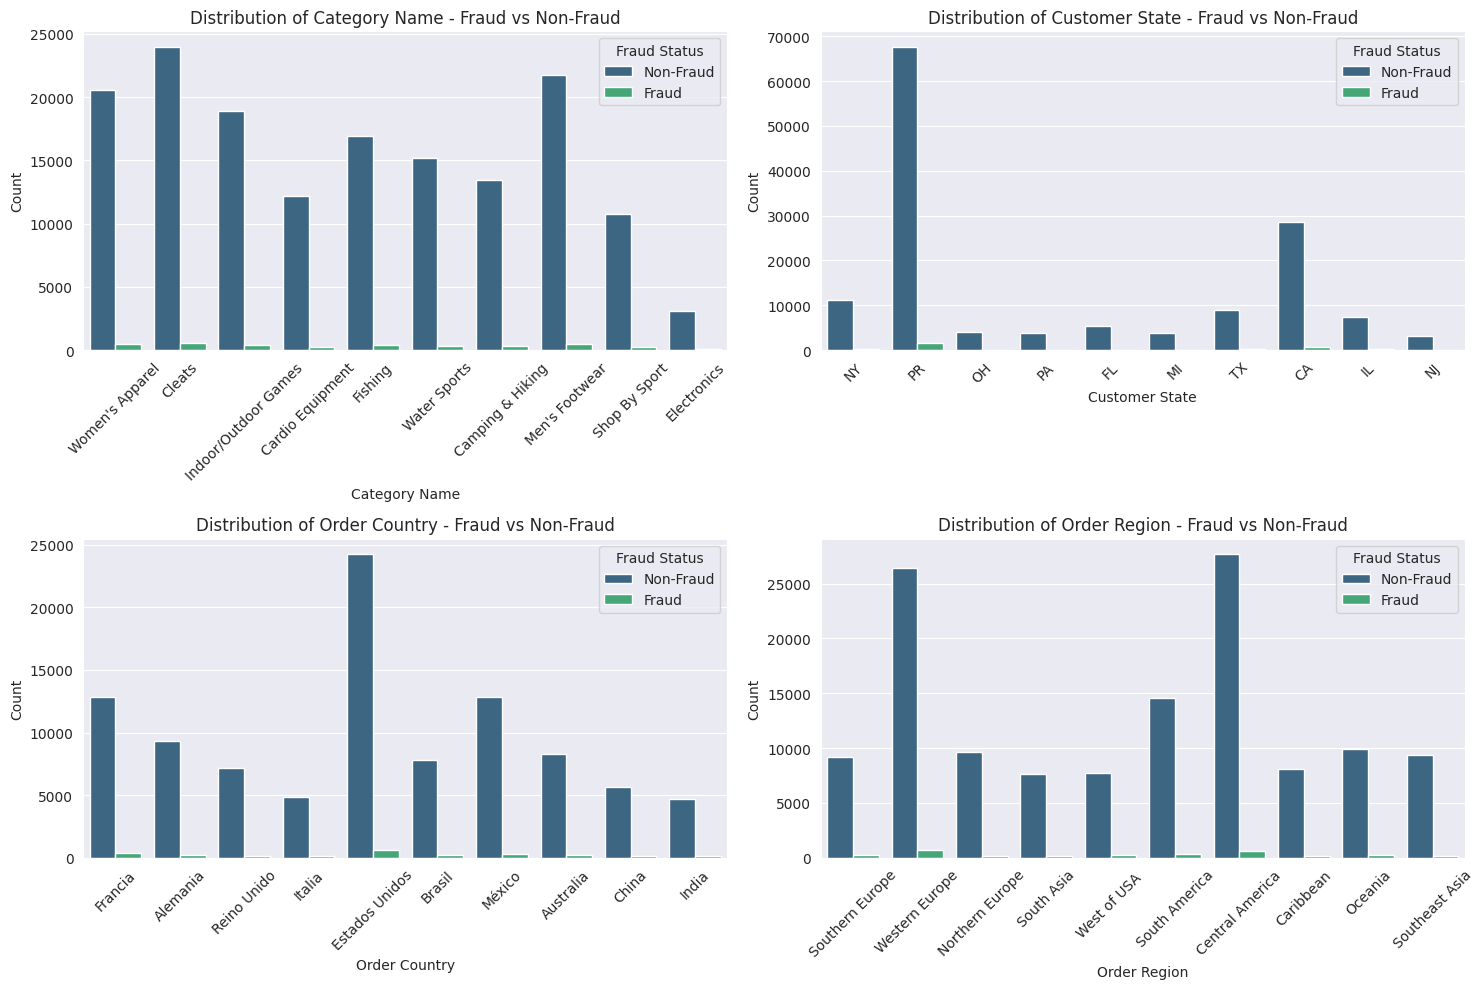

In [38]:
selected_categorical_columns = ['Category Name', 'Customer State', 'Order Country', 'Order Region']

df['Fraud Status'] = df['Order Status'].apply(lambda x: 'Fraud' if x == 'SUSPECTED_FRAUD' else 'Non-Fraud')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, col in enumerate(selected_categorical_columns):
    # Filter to top 10 categories for readability
    top_categories = df[col].value_counts().head(10).index
    filtered_data = df[df[col].isin(top_categories)]

    sns.countplot(data=filtered_data, x=col, hue='Fraud Status', ax=axs[idx], palette="viridis")
    axs[idx].set_title(f'Distribution of {col} - Fraud vs Non-Fraud')
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel('Count')
    axs[idx].legend(title='Fraud Status')
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Fraud v.s. Non-Fraud on Numerical Features

In [39]:
fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']
non_fraud_df = df[df['Order Status'] != 'SUSPECTED_FRAUD']

numerical_columns = fraud_df.select_dtypes(include=[np.number])\
                    .drop(columns=['Product Status', 'Order Profit Per Order', 'Benefit per order'
                                  , 'Order Id', 'Order Customer Id']).columns

n_rows = (len(numerical_columns) // 2) + (len(numerical_columns) % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))

for idx, col in enumerate(numerical_columns):
    plt.subplot(n_rows, 2, idx + 1)
    sns.histplot(fraud_df[col], color='red', label='Fraud', kde=True, stat="density", linewidth=0)
    sns.histplot(non_fraud_df[col], color='blue', label='Non-Fraud', kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()


KeyError: "['Product Status', 'Benefit per order', 'Order Customer Id'] not found in axis"

### Fraud Trend per Month & per Year

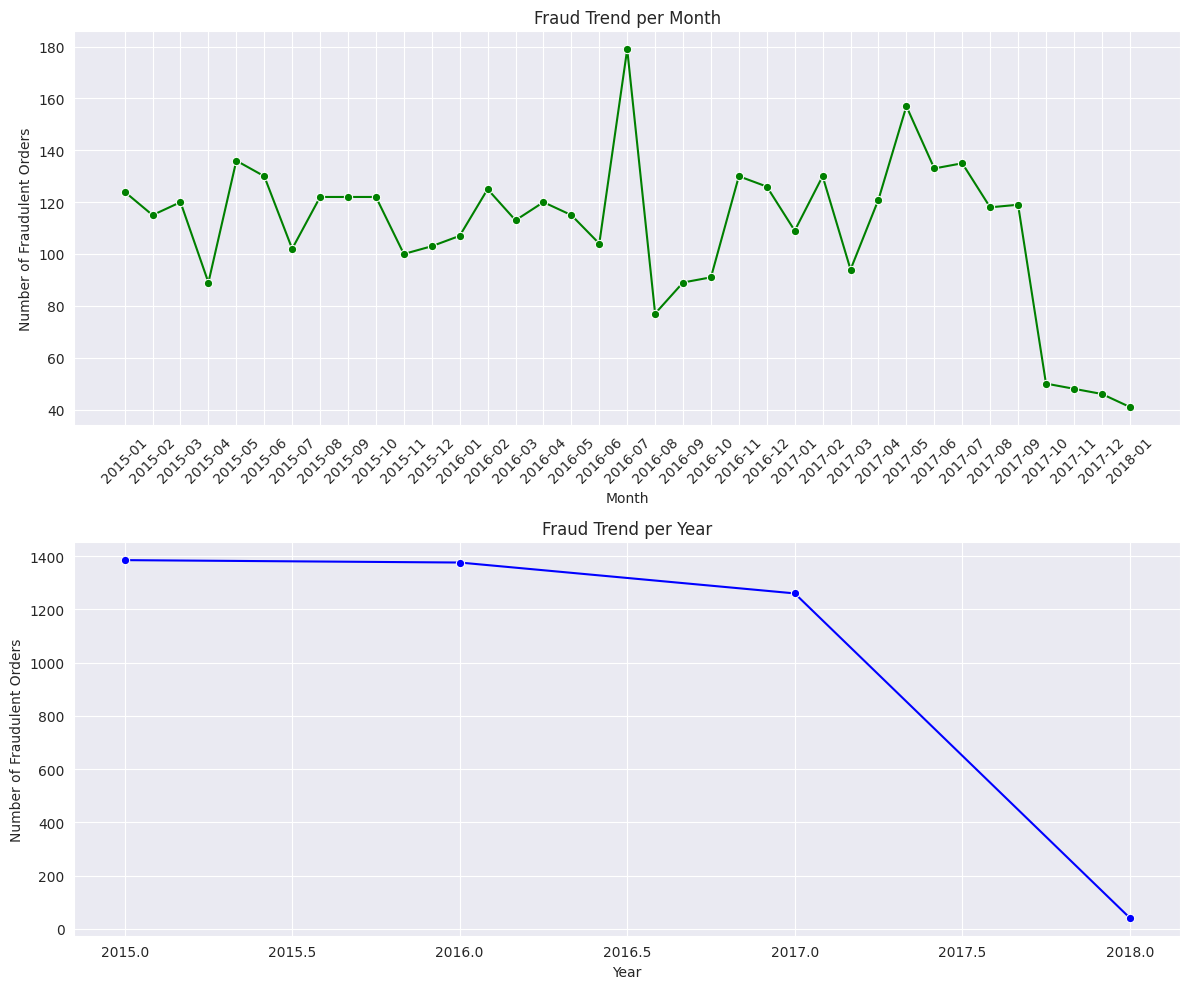

In [40]:
fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']

monthly_fraud_trend = fraud_df.groupby('YearMonth').size()
yearly_fraud_trend = fraud_df.groupby('Year').size()

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the monthly fraud trend
sns.lineplot(x=monthly_fraud_trend.index, y=monthly_fraud_trend.values, ax=axs[0], marker='o', color='green')
axs[0].set_title('Fraud Trend per Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Fraudulent Orders')
axs[0].tick_params(axis='x', rotation=45)

# Plot the yearly fraud trend
sns.lineplot(x=yearly_fraud_trend.index, y=yearly_fraud_trend.values, ax=axs[1], marker='o', color='blue')
axs[1].set_title('Fraud Trend per Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Fraudulent Orders')

plt.tight_layout()
plt.show()


### Top 10 Customers by Fraud & Cancellation Count

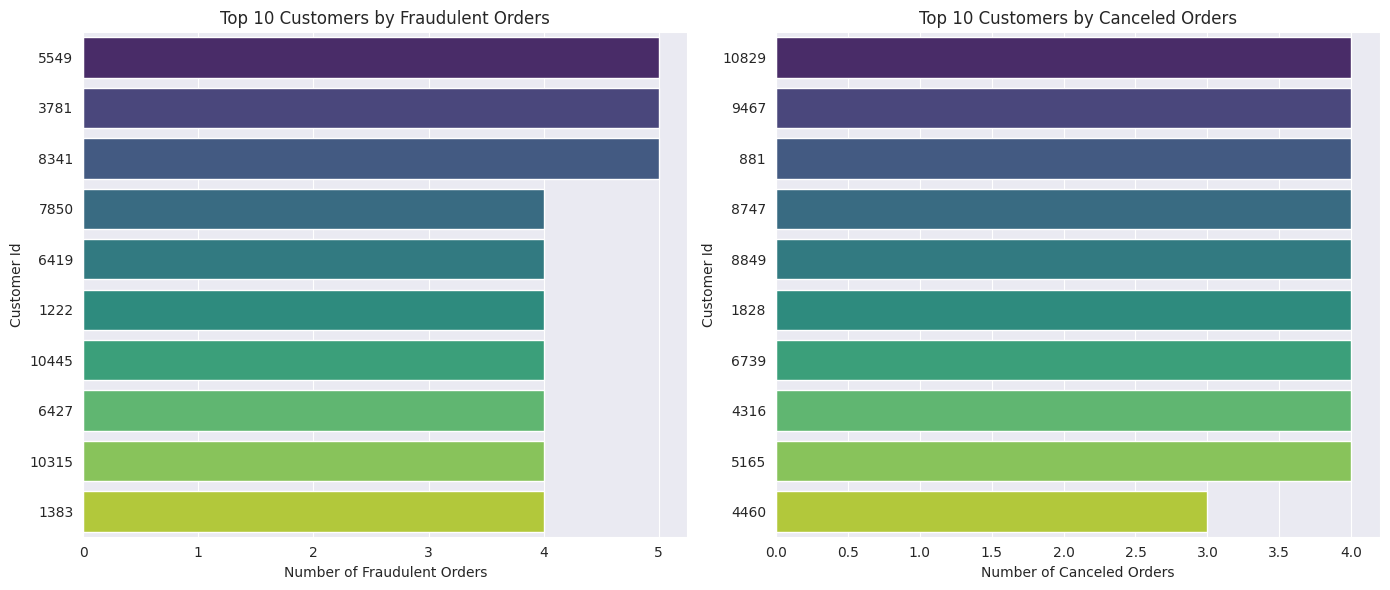

In [ ]:
fraud_orders = df[df['Order Status'] == 'SUSPECTED_FRAUD']
canceled_orders = df[df['Order Status'] == 'CANCELED']

top_fraud_customers = fraud_orders['Customer Id'].value_counts().nlargest(10)
top_canceled_customers = canceled_orders['Customer Id'].value_counts().nlargest(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 10 customers with fraudulent orders
sns.barplot(y=top_fraud_customers.index.astype(str), x=top_fraud_customers.values, ax=axs[0], palette="viridis", ci=None)
axs[0].set_title('Top 10 Customers by Fraudulent Orders')
axs[0].set_ylabel('Customer Id')
axs[0].set_xlabel('Number of Fraudulent Orders')

# Plot for top 10 customers with canceled orders
sns.barplot(y=top_canceled_customers.index.astype(str), x=top_canceled_customers.values, ax=axs[1], palette="viridis", ci=None)
axs[1].set_title('Top 10 Customers by Canceled Orders')
axs[1].set_ylabel('Customer Id')
axs[1].set_xlabel('Number of Canceled Orders')

plt.tight_layout()
plt.show()
